In [1]:
#pip install pandas

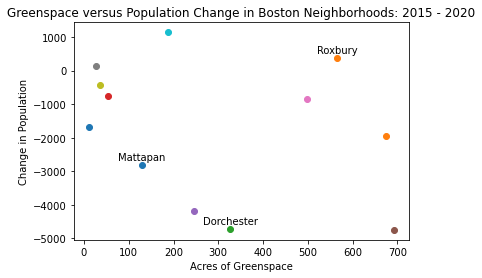

Correlation Coefficient: -0.30004374096415903


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

recentPop = pd.read_csv('./data/boston pop.csv')
oldPop = pd.read_csv('./data/2015-19 census data.csv')
open_space = pd.read_csv('./data/Open_Space.csv')
#sort = pop.sort_values(by='muni_id')
locations = ['Mattapan', 'Roxbury', 'Dorchester', 'Charlestown', 'East Boston', 'Hyde Park', 'Jamaica Plain', 'Mission Hill', 
             'Roslindale', 'South Boston', 'South End', 'West Roxbury']

totPop2020 = []
whitePop2020 = []
afAmeriPop2020 = []
hisPop2020 = []
asianPop2020 = []
otherPop2020 = []

totPop2015 = []
whitePop2015 = []
afAmeriPop2015 = []
hisPop2015 = []
asianPop2015 = []
otherPop2015 = []

greenspaces = []

#filter out places that are not considered greenways
open_space = open_space.loc[(open_space["TypeLong"] != "Cemeteries & Burying Grounds") 
                            & (open_space["TypeLong"] != "Malls, Squares & Plazas")]

for location in locations:
    df_acres = open_space[open_space["DISTRICT"] == location]
    greenspaces.append(df_acres['ACRES'].sum())

    white2020 = int(recentPop[recentPop['Area'] == location]['White alone'])
    afAmeri2020 = int(recentPop[recentPop['Area'] == location]['Black or African American alone'])
    his2020 = int(recentPop[recentPop['Area'] == location]['Hispanic or Latino'])
    asian2020 = int(recentPop[recentPop['Area'] == location]['Asian'])
    other2020 = int(recentPop[recentPop['Area'] == location]['Other Races'])

    whitePop2020.append(white2020)
    afAmeriPop2020.append(afAmeri2020)
    hisPop2020.append(his2020)
    asianPop2020.append(asian2020)
    otherPop2020.append(other2020)
    totPop2020.append(int(recentPop[recentPop['Area'] == location]['Total']))

    white2015 = int(oldPop[oldPop['Area'] == location]['White Alone'])
    afAmeri2015 = int(oldPop[oldPop['Area'] == location]['Black/African-American'])
    his2015 = int(oldPop[oldPop['Area'] == location]['Hispanic'])
    asian2015 = int(oldPop[oldPop['Area'] == location]['Asian alone'])
    other2015 = int(oldPop[oldPop['Area'] == location]['Other Races'])
    total2015 = white2015 + afAmeri2015 + his2015 + asian2015 + other2015

    whitePop2015.append(white2015)
    afAmeriPop2015.append(afAmeri2015)
    hisPop2015.append(his2015)
    asianPop2015.append(asian2015)
    otherPop2015.append(other2015)
    totPop2015.append(total2015)

focus = ['Mattapan', 'Roxbury', 'Dorchester'] 

diff = [x - y for x, y in zip(totPop2020, totPop2015)]

for i, location in enumerate(locations):
    plt.scatter(greenspaces[i], diff[i], label=location)

    if location in focus:
        plt.annotate(location, (greenspaces[i], diff[i]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.ylabel('Change in Population')
plt.xlabel('Acres of Greenspace')
plt.title('Greenspace versus Population Change in Boston Neighborhoods: 2015 - 2020')
plt.show()

correlation_coefficient, _ = pearsonr(greenspaces, diff)
print("Correlation Coefficient: " + str(correlation_coefficient))


The graph depicts all populations and compares the change in population with the acres of greenspace. From the graph, we can see that there is a weak negative correlation between the two, but this does not mean there is causation.

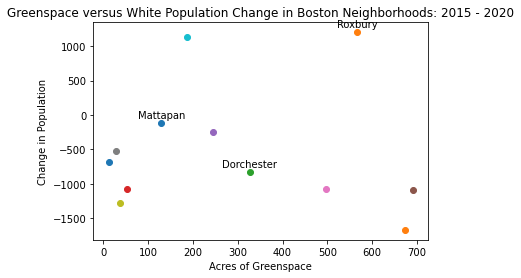

Correlation Coefficient: -0.07755391322386153


In [3]:
diff = [x - y for x, y in zip(whitePop2020, whitePop2015)]

for i, location in enumerate(locations):
    plt.scatter(greenspaces[i], diff[i], label=location)

    if location in focus:
        plt.annotate(location, (greenspaces[i], diff[i]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.ylabel('Change in Population')
plt.xlabel('Acres of Greenspace')
plt.title('Greenspace versus White Population Change in Boston Neighborhoods: 2015 - 2020')
plt.show()

correlation_coefficient, _ = pearsonr(greenspaces, diff)
print("Correlation Coefficient: " + str(correlation_coefficient))

For white populations, little to no correlation can be seen. 

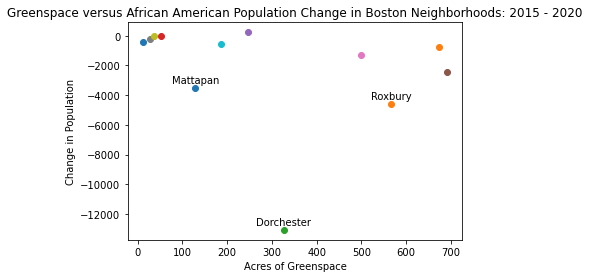

Correlation Coefficient: -0.24139106260161658


In [4]:
diff = [x - y for x, y in zip(afAmeriPop2020, afAmeriPop2015)]

for i, location in enumerate(locations):
    plt.scatter(greenspaces[i], diff[i], label=location)

    if location in focus:
        plt.annotate(location, (greenspaces[i], diff[i]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.ylabel('Change in Population')
plt.xlabel('Acres of Greenspace')
plt.title('Greenspace versus African American Population Change in Boston Neighborhoods: 2015 - 2020')
plt.show()

correlation_coefficient, _ = pearsonr(greenspaces, diff)
print("Correlation Coefficient: " + str(correlation_coefficient))

In African American populations, there is a slight negative correlation. Dorchester is the only real big outlier, which could be impacting the correlation coefficient.

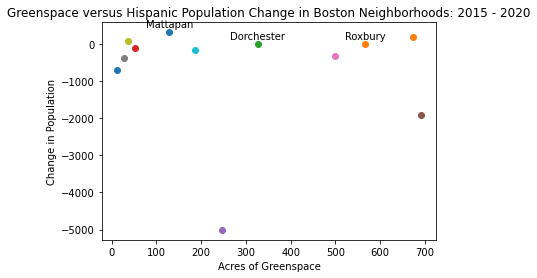

Correlation Coefficient: -0.06984862793003781


In [5]:
diff = [x - y for x, y in zip(hisPop2020, hisPop2015)]

for i, location in enumerate(locations):
    plt.scatter(greenspaces[i], diff[i], label=location)

    if location in focus:
        plt.annotate(location, (greenspaces[i], diff[i]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.ylabel('Change in Population')
plt.xlabel('Acres of Greenspace')
plt.title('Greenspace versus Hispanic Population Change in Boston Neighborhoods: 2015 - 2020')
plt.show()

correlation_coefficient, _ = pearsonr(greenspaces, diff)
print("Correlation Coefficient: " + str(correlation_coefficient))

Hispanic populations also show little to no correlation.

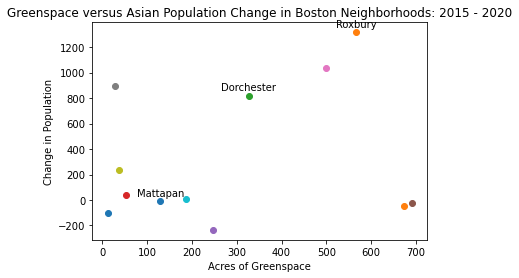

Correlation Coefficient: 0.21481525566943493


In [6]:
diff = [x - y for x, y in zip(asianPop2020, asianPop2015)]

for i, location in enumerate(locations):
    plt.scatter(greenspaces[i], diff[i], label=location)

    if location in focus:
        plt.annotate(location, (greenspaces[i], diff[i]), textcoords="offset points", xytext=(0, 5), ha='center')
        
plt.ylabel('Change in Population')
plt.xlabel('Acres of Greenspace')
plt.title('Greenspace versus Asian Population Change in Boston Neighborhoods: 2015 - 2020')
plt.show()

correlation_coefficient, _ = pearsonr(greenspaces, diff)
print("Correlation Coefficient: " + str(correlation_coefficient))

In Asian populations, a slight positive correlation can be seen between change in population and greenspace.

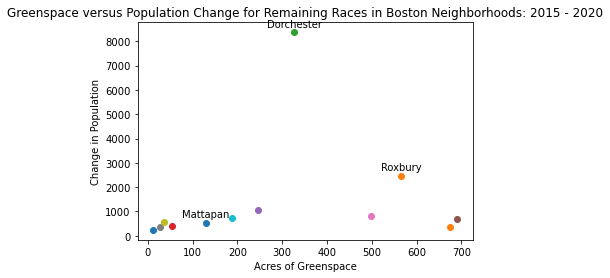

Correlation Coefficient: 0.15605657810809356


In [7]:
diff = [x - y for x, y in zip(otherPop2020, otherPop2015)]

for i, location in enumerate(locations):
    plt.scatter(greenspaces[i], diff[i], label=location)

    if location in focus:
        plt.annotate(location, (greenspaces[i], diff[i]), textcoords="offset points", xytext=(0, 5), ha='center')
        
plt.ylabel('Change in Population')
plt.xlabel('Acres of Greenspace')
plt.title('Greenspace versus Population Change for Remaining Races in Boston Neighborhoods: 2015 - 2020')
plt.show()

correlation_coefficient, _ = pearsonr(greenspaces, diff)
print("Correlation Coefficient: " + str(correlation_coefficient))

For all remaning races, a slight positive correlation can be found. However, there are outliers such as Dorchester and maybe Roxbury. Based on these early insights on the data, we again cannot confidently make claims on if there is correlation between the change in population and greenspace. Our data on the different races shows that the correlation varies from race to race. In addition, common outliers can be seen: Roxbury and Dorchester. While we continue to work with and incorporate new data, we will keep an eye on these regions to see if they are continuously outliers.